<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 173.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 178.0 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 176.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 135.7 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-04 15:13:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.6MB/s    in 2.4s    

2025-04-04 15:13:12 (63.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [51]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Installer l'environnement pour les query SQLite </h3>

In [4]:
!pip install pandas sqlalchemy

In [5]:
import sqlite3

# Connexion à la base de données SQLite
conn = sqlite3.connect('survey-data.sqlite')

In [6]:
# Requête pour obtenir les noms des tables
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Exécution de la requête
tables = conn.execute(query).fetchall()

# Affichage des noms des tables
for table in tables:
    print(table[0])

main


In [7]:
#tester la query et viusaliser les data
query = "SELECT * FROM main LIMIT 5"
df = pd.read_sql_query(query, conn)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [28]:
QUERY = """SELECT Age, JobSatPoints_6,JobSatPoints_7 FROM main """
df_jobsat_age = pd.read_sql_query(QUERY, conn)

In [29]:
(df_jobsat_age.isnull().sum())

Age                   0
JobSatPoints_6    35987
JobSatPoints_7    35989
dtype: int64

In [30]:
df_jobsat_age.dropna(subset=['JobSatPoints_6','JobSatPoints_7'],inplace=True)

In [31]:
(df_jobsat_age.isnull().sum())

Age               0
JobSatPoints_6    0
JobSatPoints_7    0
dtype: int64

In [32]:
#group by age, et aggreger avec la mediane
df_jobsat_med = df_jobsat_age.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

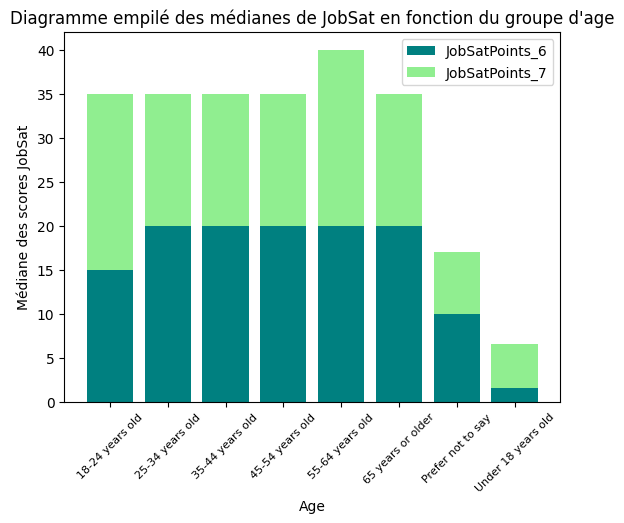

In [35]:
# Création du diagramme empilé
plt.bar(df_jobsat_med.index, df_jobsat_med['JobSatPoints_6'], label="JobSatPoints_6", color='teal')
plt.bar(df_jobsat_med.index, df_jobsat_med['JobSatPoints_7'], bottom=df_jobsat_med['JobSatPoints_6'], label="JobSatPoints_7", color='lightgreen')

# Ajout des labels et du titre
plt.xlabel("Age")
plt.ylabel("Médiane des scores JobSat")
plt.title("Diagramme empilé des médianes de JobSat en fonction du groupe d'age")
plt.xticks(rotation=45, fontsize=8)
plt.legend()

# Affichage du graphique
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [37]:
QUERY = """SELECT Employment, JobSatPoints_6,JobSatPoints_7 FROM main"""
df_jobsat_employ =pd.read_sql_query(QUERY, conn)

In [38]:
#simplifier le status d'emploi
# Fonction de simplification
def simplify_employment(status):
    if pd.isna(status):  # juste au cas ou mais il n'y a pas de NaN
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Application de la fonction
df_jobsat_employ['Employment_status'] = df_jobsat_employ['Employment'].apply(simplify_employment)

# Aperçu des résultats
print(df_jobsat_employ['Employment_status'].head())

0    Employed full-time
1    Employed full-time
2    Employed full-time
3               Student
4               Student
Name: Employment_status, dtype: object


In [40]:
df_jobsat_employ.dropna(subset=['JobSatPoints_6','JobSatPoints_7'],inplace=True)

In [41]:
(df_jobsat_employ.isnull().sum())

Employment           0
JobSatPoints_6       0
JobSatPoints_7       0
Employment_status    0
dtype: int64

In [49]:
#group by age, et aggreger avec la mediane
df_jobsat_employ_gr = df_jobsat_employ.groupby('Employment_status')[['JobSatPoints_6', 'JobSatPoints_7']].median()

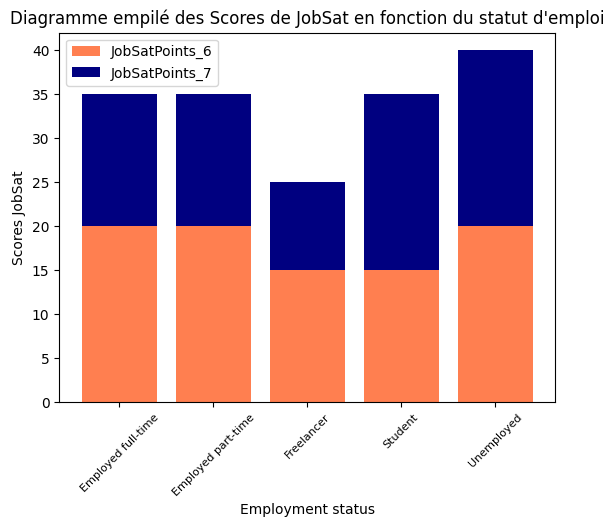

In [50]:
# Création du diagramme empilé
plt.bar(df_jobsat_employ_gr.index, df_jobsat_employ_gr['JobSatPoints_6'], label="JobSatPoints_6", color='coral')
plt.bar(df_jobsat_employ_gr.index, df_jobsat_employ_gr['JobSatPoints_7'], bottom=df_jobsat_employ_gr['JobSatPoints_6'], label="JobSatPoints_7", color='navy')

# Ajout des labels et du titre
plt.xlabel("Employment status")
plt.ylabel("Scores JobSat")
plt.title("Diagramme empilé des Scores de JobSat en fonction du statut d'emploi")
plt.xticks(rotation=45, fontsize=8)
plt.legend()

# Affichage du graphique
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [9]:
QUERY ="""SELECT DISTINCT(Age) FROM main """ 
pd.read_sql_query(QUERY,conn)

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,25-34 years old
5,55-64 years old
6,Prefer not to say
7,65 years or older


In [25]:
#pas de groupe 30-35 alors on va prendre 25-34 !
QUERY = """SELECT Age, ConvertedCompYearly,JobSatPoints_6 FROM main """ 
df_comp = pd.read_sql_query(QUERY,conn)

In [26]:
(df_comp.isnull().sum())

Age                        0
ConvertedCompYearly    42002
JobSatPoints_6         35987
dtype: int64

In [27]:
#outlier de convertedCompYearly
Q3 = df_comp['ConvertedCompYearly'].quantile(0.75) 
Q1 = df_comp['ConvertedCompYearly'].quantile(0.25) 
IQR = Q3-Q1 
higher_outlier = Q3 + 1.5*IQR
higher_outlier

np.float64(220860.75)

In [28]:
df_comp_filtered =df_comp[df_comp['ConvertedCompYearly']<higher_outlier]

In [29]:
df_comp_filtered.value_counts()

Age              ConvertedCompYearly  JobSatPoints_6
25-34 years old  48333.0              0.0               24
                 64444.0              0.0               22
                 53703.0              20.0              21
                 59073.0              0.0               18
                 64444.0              20.0              17
                                                        ..
                 41469.0              0.0                1
                                      30.0               1
                 41470.0              0.0                1
                 41566.0              20.0               1
                 41351.0              5.0                1
Name: count, Length: 11680, dtype: int64

In [32]:
(df_comp_filtered['ConvertedCompYearly'].mean())

np.float64(71347.20189695864)

In [33]:
#standarisation
min_converted = df_comp_filtered['ConvertedCompYearly'].min()
max_converted = df_comp_filtered['ConvertedCompYearly'].max()
df_comp_filtered['ConvertedCompYearly']=(df_comp_filtered['ConvertedCompYearly']-min_converted)/(max_converted-min_converted)

/tmp/ipykernel_301/3236159401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_filtered['ConvertedCompYearly']=(df_comp_filtered['ConvertedCompYearly']-min_converted)/(max_converted-min_converted)


In [34]:
min_job = df_comp_filtered['JobSatPoints_6'].min()
max_job = df_comp_filtered['JobSatPoints_6'].max()
df_comp_filtered['JobSatPoints_6']=(df_comp_filtered['JobSatPoints_6']-min_job)/(max_job-min_job)

/tmp/ipykernel_301/1939559300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_filtered['JobSatPoints_6']=(df_comp_filtered['JobSatPoints_6']-min_job)/(max_job-min_job)


In [35]:
(df_comp_filtered.isnull().sum())

Age                       0
ConvertedCompYearly       0
JobSatPoints_6         6910
dtype: int64

In [36]:
(df_comp_filtered['ConvertedCompYearly'].mean())

np.float64(0.32399753820040617)

In [37]:
df_comp_filtered['JobSatPoints_6'].mean()

np.float64(0.2527604039364508)

In [38]:
df_comp_filtered.dropna(subset=['JobSatPoints_6'],inplace=True)

/tmp/ipykernel_301/3470283051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_filtered.dropna(subset=['JobSatPoints_6'],inplace=True)


In [39]:
(df_comp_filtered.isnull().sum())

Age                    0
ConvertedCompYearly    0
JobSatPoints_6         0
dtype: int64

In [45]:
#group by age, et aggreger avec la moyenne
df_comp_grouped = df_comp_filtered.groupby('Age')[['JobSatPoints_6', 'ConvertedCompYearly']].median()

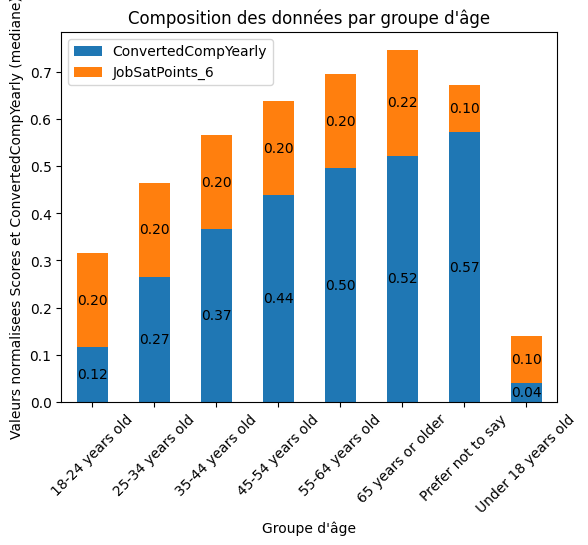

In [49]:
# Créer un graphique empilé
ax = df_comp_grouped[['ConvertedCompYearly', 'JobSatPoints_6']].plot(kind='bar', stacked=True)

# Ajouter des annotations
for container in ax.containers:
    # Ajouter des annotations pour chaque segment
    ax.bar_label(container, fmt='%.2f', label_type='center')

#Ajout des labels et le titre
plt.xlabel("Groupe d'âge")
plt.xticks(rotation=45)
plt.ylabel("Valeurs normalisees Scores et ConvertedCompYearly (mediane)")
plt.title("Composition des données par groupe d'âge")
# Annotation des barres
plt.legend()

# Affichage du graphique
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [54]:
# Obtenir les colonnes d'une table
cursor = conn.execute("PRAGMA table_info(main)")
columns = [row[1] for row in cursor.fetchall()]  # Le nom de la colonne est dans la 2ème position (index 1)

# Filtrer les colonnes contenant ou commençant par 'Database'
matching_columns = [col for col in columns if 'Database' in col or col.startswith('Database')]

print(matching_columns)

['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']


In [63]:
QUERY = """ SELECT Age, DatabaseWantToWorkWith, ResponseId FROM main """ 
df_database = pd.read_sql_query(QUERY,conn)

In [64]:
df_database.head()

,Age,DatabaseWantToWorkWith,ResponseId
0,Under 18 years old,None,1
1,35-44 years old,PostgreSQL,2
2,45-54 years old,Firebase Realtime Database,3
3,18-24 years old,MongoDB;MySQL;PostgreSQL,4
4,18-24 years old,PostgreSQL;SQLite,5


In [65]:
(df_database.isnull().sum())

Age                           0
DatabaseWantToWorkWith    22879
ResponseId                    0
dtype: int64

In [66]:
df_database['DatabaseWantToWorkWith']=df_database['DatabaseWantToWorkWith'].str.split(';') 
df_database_exploded=df_database.explode('DatabaseWantToWorkWith')

In [74]:
df_database_exploded['DatabaseWantToWorkWith'].head()

0                          None
1                    PostgreSQL
2    Firebase Realtime Database
3                       MongoDB
3                         MySQL
Name: DatabaseWantToWorkWith, dtype: object

In [79]:
df_database_counts = df_database_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

In [80]:
top_5_databases = df_database_counts.groupby('Age').apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

/tmp/ipykernel_301/2579048945.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_databases = df_database_counts.groupby('Age').apply(


In [81]:
df_pivot = top_5_databases.pivot(index='Age', columns='DatabaseWantToWorkWith', values='Count').fillna(0)

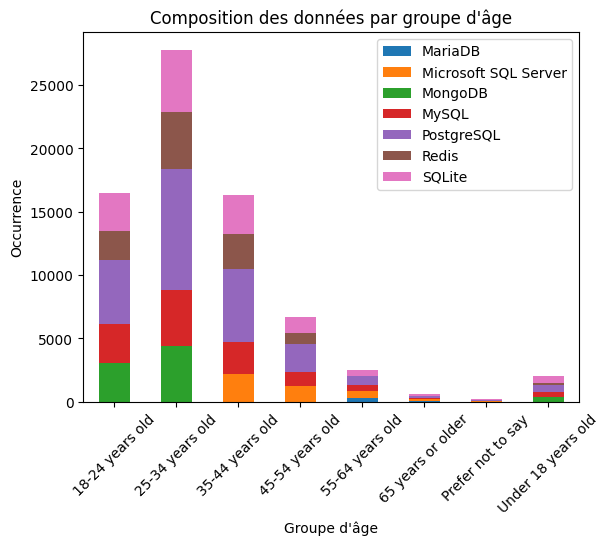

In [83]:
# Créer un graphique empilé
ax = df_pivot.plot(kind='bar', stacked=True)

#Ajout des labels et le titre
plt.xlabel("Groupe d'âge")
plt.xticks(rotation=45)
plt.ylabel("Occurrence")
plt.title("Composition des données par groupe d'âge")
# Annotation des barres
plt.legend()

# Affichage du graphique
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [86]:
QUERY = """SELECT Employment, JobSat, ResponseId FROM main """ 
df_job = pd.read_sql_query(QUERY,conn)

In [87]:
#simplifier les employment type
# Fonction de simplification
def simplify_employment(status):
    if pd.isna(status):  # juste au cas ou mais il n'y a pas de NaN
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Application de la fonction
df_job['Employment_status'] = df_job['Employment'].apply(simplify_employment)

In [88]:
(df_job.isnull().sum())

Employment               0
JobSat               36311
ResponseId               0
Employment_status        0
dtype: int64

In [89]:
df_job.dropna(subset='JobSat',inplace=True)

In [90]:
(df_job.isnull().sum())

Employment           0
JobSat               0
ResponseId           0
Employment_status    0
dtype: int64

In [93]:
df_employment_counts = df_job.groupby(['JobSat', 'Employment_status']).size().reset_index(name='Count')

In [95]:
df_pivot_job = df_employment_counts.pivot(index='JobSat', columns='Employment_status', values='Count').fillna(0)

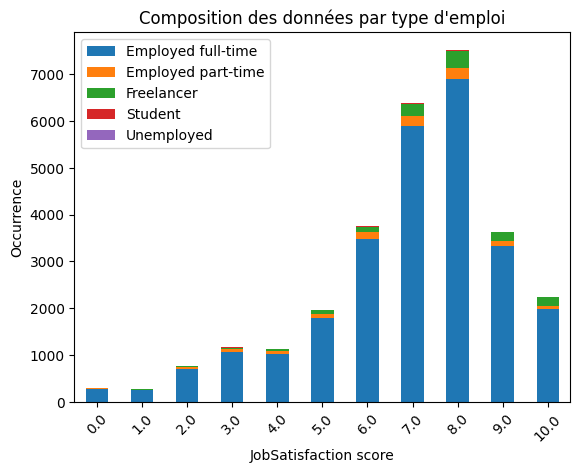

In [96]:
# Créer un graphique empilé
ax = df_pivot_job.plot(kind='bar', stacked=True)

#Ajout des labels et le titre
plt.xlabel("JobSatisfaction score")
plt.xticks(rotation=45)
plt.ylabel("Occurrence")
plt.title("Composition des données par type d'emploi")
# Annotation des barres
plt.legend()

# Affichage du graphique
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [97]:
QUERY = """ SELECT Age, LanguageAdmired, ResponseId FROM main """ 
df_lang = pd.read_sql_query(QUERY,conn)

In [98]:
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.split(';') 
df_lang_exploded = df_lang.explode('LanguageAdmired') 

In [99]:
df_lang_counts = df_lang_exploded.groupby(['Age', 'LanguageAdmired']).size().reset_index(name='Count')

In [100]:
top_5_lang = df_lang_counts.groupby('Age').apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

/tmp/ipykernel_301/4003412738.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_lang = df_lang_counts.groupby('Age').apply(


In [102]:
df_pivot_lang = top_5_lang.pivot(index='Age', columns='LanguageAdmired', values='Count').fillna(0)

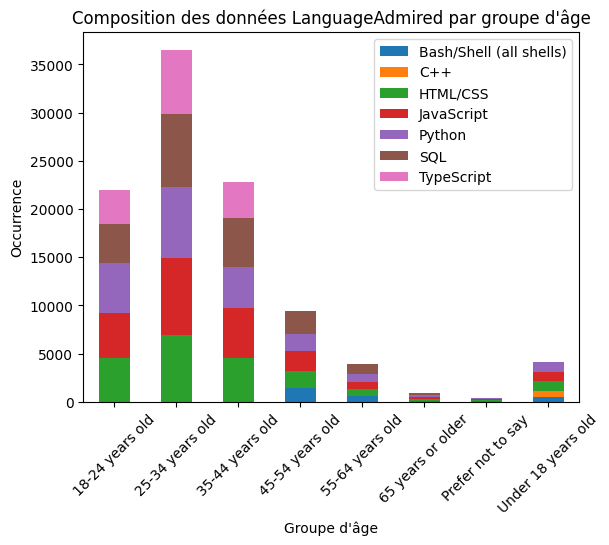

In [103]:
# Créer un graphique empilé
ax = df_pivot_lang.plot(kind='bar', stacked=True)

#Ajout des labels et le titre
plt.xlabel("Groupe d'âge")
plt.xticks(rotation=45)
plt.ylabel("Occurrence")
plt.title("Composition des données LanguageAdmired par groupe d'âge")
# Annotation des barres
plt.legend()

# Affichage du graphique
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [104]:
QUERY = """ SELECT Employment, PlatformAdmired, ResponseID FROM main """ 
df_plateform = pd.read_sql_query(QUERY,conn)

In [105]:
# Application de la fonction pour le status Emplyment
df_plateform['Employment_status'] = df_plateform['Employment'].apply(simplify_employment)

In [106]:
#spliter les plateformes
df_plateform['PlatformAdmired']=df_plateform['PlatformAdmired'].str.split(';')
df_plateform_exploded = df_plateform.explode('PlatformAdmired')

In [107]:
df_plateform_exploded['PlatformAdmired'].head()

0                         None
1    Amazon Web Services (AWS)
1                       Heroku
1                      Netlify
2                 Google Cloud
Name: PlatformAdmired, dtype: object

In [108]:
df_plateform_counts = df_plateform_exploded.groupby(['Employment_status', 'PlatformAdmired']).size().reset_index(name='Count')


In [109]:
top_5_plateform = df_plateform_counts.groupby('Employment_status').apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

/tmp/ipykernel_301/3057809596.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_plateform = df_plateform_counts.groupby('Employment_status').apply(


In [110]:
df_pivot_plateform = top_5_plateform.pivot(index='Employment_status', columns='PlatformAdmired', values='Count').fillna(0)

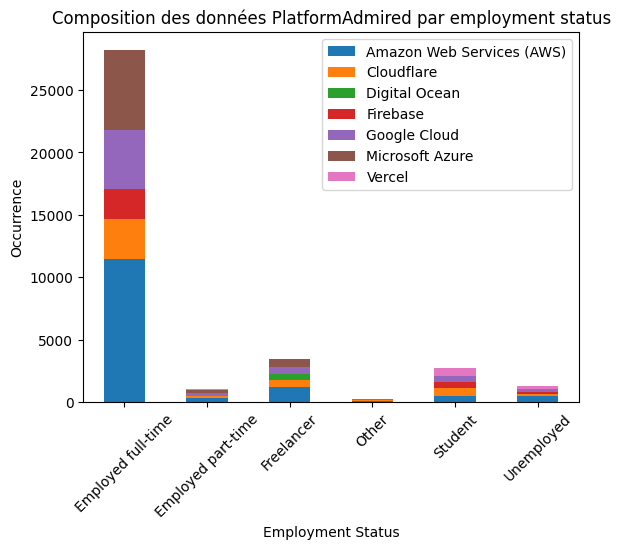

In [111]:
# Créer un graphique empilé
ax = df_pivot_plateform.plot(kind='bar', stacked=True)

#Ajout des labels et le titre
plt.xlabel("Employment Status")
plt.xticks(rotation=45)
plt.ylabel("Occurrence")
plt.title("Composition des données PlatformAdmired par employment status")
# Annotation des barres
plt.legend()

# Affichage du graphique
plt.show()

In [112]:
#fermer la connection SQLite
conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
